<a href="https://colab.research.google.com/github/Anarki1983/ML/blob/master/mlp_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [0]:
from keras.datasets.mnist import load_data
# ((訓練圖片, 訓練圖片答案), (測試圖片, 測試圖片答案))
(x_train, y_train), (x_test, y_test) = load_data()

Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step


In [0]:
x_train.shape

(60000, 28, 28)

In [0]:
print("訓練資料維度", x_train.shape)
print("測試資料維度", x_test.shape)

訓練資料維度 (60000, 28, 28)
測試資料維度 (10000, 28, 28)


正確答案 1


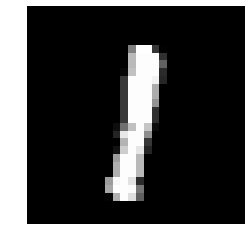

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
import random
c = random.randint(0, 59999)
print("正確答案", y_train[c])
plt.axis("off") # 不印出軸線
plt.imshow(x_train[c], cmap="gray") # 印出圖片

In [0]:
import pandas as pd
pd.DataFrame(x_train[c])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,127,255,255,54,2,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,186,253,253,253,49,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,186,253,253,253,97,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,6,193,253,253,253,43,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,56,253,253,253,243,38,0,0,0,0,0,0,0,0,0,0


In [0]:
# step 1.1處理圖片 (reshape-> / 255)
x_train_shape = x_train.reshape(60000, 784) / 255 # 轉換為一維陣列, 然後將數值縮小至0-1之間
x_test_shape = x_test.reshape(10000, 784) / 255

In [0]:
# shape 1.2處理答案 One-Hot Encoding
from keras.utils.np_utils import to_categorical
y_train_cat = to_categorical(y_train) # 轉換為十個機率(One-Hot Encoding)
y_test_cat = to_categorical(y_test)
print("處理前", y_train[0])
print("處理後", y_train_cat[0])

處理前 5
處理後 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [0]:
# step 2 建立模型
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(128, activation="relu", input_dim=784)) # 128根神經, 激活函式為relu, 輸入維度784
model.add(Dense(10, activation="softmax")) # Q.激活函式如何選擇? A.中間層relu, 最後一層只有一個神經元選sigmoid, 兩個神經元以上選softmax(總和為1)
model.summary() 
# dense_1 params = 100480, 784(Input)*128(Output = 神經元) + 128(Bias = relu的門檻值)
# dense_2 params = 128(Input)*10(Output) + 10(Bias) = 1290

W0814 22:29:08.791484 140289265354624 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0814 22:29:08.854228 140289265354624 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0814 22:29:08.862132 140289265354624 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


***亂度***

Loss 方法適用在預測特定數值(回歸問題), 而不適合輸出多個機率(分類問題)

機率適合使用亂度(雜亂程度)來做輸出

I(不確定度) = log 1/p   Entropy(亂度) = 平均不確定度 = sigma p * log 1/p

亂度越低, 機率分布越集中(特定項目機率高, 其餘項目機率低)

I(預測機率的不確定度) = log 1/q  CrossEntropy = 平均預測亂度 = sigma * log 1/q

預測越準, 預測亂度越小

預測結果為機率時, 用 交叉熵 來當 Loss, 當交叉熵最小時, 預測機率 = 正確機率

最後輸出一個神經元時(sigmoid) Loss選 binary_crossentropy

最後輸出多個神經元時(softmax) Loss選 categorical_crossentropy

***adam 優化器***

梯度下降問題一

next weights = current weights - 常數 * 梯度

常數大 容易超過最低點

常數小 預測次數太多

梯度下降問題二

誤以為局部最低點為全局最低點

adam 優化器同時優化上面兩個問題

In [0]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

W0814 22:29:12.621458 140289265354624 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0814 22:29:12.739967 140289265354624 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



Batch 設置

多看幾筆資料做一次梯度下降 batch_size=200, 看兩百筆資料做一次梯度下降

Epochs設置

整份資料看幾輪

梯度下降調整次數 = 資料數(60000) * 10(epochs) / 200 (batch)

> 訓練次數過多時, 會發生 Overfitting, 預測結果反而越來越不準, 此時應降低 Epochs

> Validation Loss 開始平滑時就可以停了

Validation Split

留下部分訓練資料作為驗證使用, 數值為0~1之間, 0.1= 10%訓練資料拿來驗證

In [0]:
# step 3 訓練模型
model.fit(x_train_shape, 
          y_train_cat,
          batch_size=200, 
          epochs=5, # 10, Overfitting
          validation_split=0.1,
          verbose=2) # 訊息

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
 - 2s - loss: 0.0211 - acc: 0.9953 - val_loss: 0.0756 - val_acc: 0.9782
Epoch 2/5
 - 2s - loss: 0.0185 - acc: 0.9961 - val_loss: 0.0807 - val_acc: 0.9778
Epoch 3/5
 - 2s - loss: 0.0157 - acc: 0.9969 - val_loss: 0.0774 - val_acc: 0.9800
Epoch 4/5
 - 2s - loss: 0.0141 - acc: 0.9975 - val_loss: 0.0753 - val_acc: 0.9800
Epoch 5/5
 - 2s - loss: 0.0127 - acc: 0.9979 - val_loss: 0.0787 - val_acc: 0.9797


In [0]:
# step 4 驗證模型
model.evaluate(x_test_shape, y_test_cat)

10000/10000 [==============================] - 0s 28us/step


[0.07970833930954686, 0.9788]

In [0]:
print("預測機率:", model.predict(x_test_shape))
print("預測答案:", model.predict_classes(x_test_shape))

預測機率: [[4.63605062e-07 1.14746346e-09 1.30206945e-05 ... 9.95974481e-01
  9.61973819e-06 2.20224683e-05]
 [5.77102410e-09 1.44173700e-05 9.99985456e-01 ... 1.16398730e-17
  3.17593489e-08 7.60992717e-16]
 [1.37252609e-08 9.99607980e-01 2.46930704e-05 ... 1.20524572e-04
  2.21793860e-04 2.55848704e-07]
 ...
 [3.70539984e-14 1.91242725e-12 7.08982244e-13 ... 2.79912200e-07
  4.78607376e-07 4.10407938e-06]
 [1.40199885e-12 9.52142119e-13 5.16806209e-14 ... 6.91036742e-11
  1.22859601e-05 8.78667341e-15]
 [7.89663300e-12 2.21266927e-14 2.28303661e-11 ... 9.41635720e-20
  1.96760976e-14 1.46578721e-16]]
預測答案: [7 2 1 ... 4 5 6]


In [0]:
from sklearn.metrics import confusion_matrix
import pandas as pd
pre =  model.predict_classes(x_test_shape)
pd.DataFrame(confusion_matrix(y_test, pre)) # 用正式資料來驗證模型

,0,1,2,3,4,5,6,7,8,9
0,968,0,1,3,1,1,2,0,4,0
1,0,1124,3,1,0,1,2,1,3,0
2,4,1,1014,3,0,0,2,3,5,0
3,1,0,2,990,0,5,0,4,4,4
4,2,1,4,0,956,1,5,2,0,11
5,3,0,0,5,0,878,4,0,2,0
6,5,2,3,1,1,3,942,0,1,0
7,2,3,9,4,1,0,0,1000,4,5
8,3,0,3,8,4,5,2,3,944,2
9,2,4,1,8,7,9,0,3,3,972


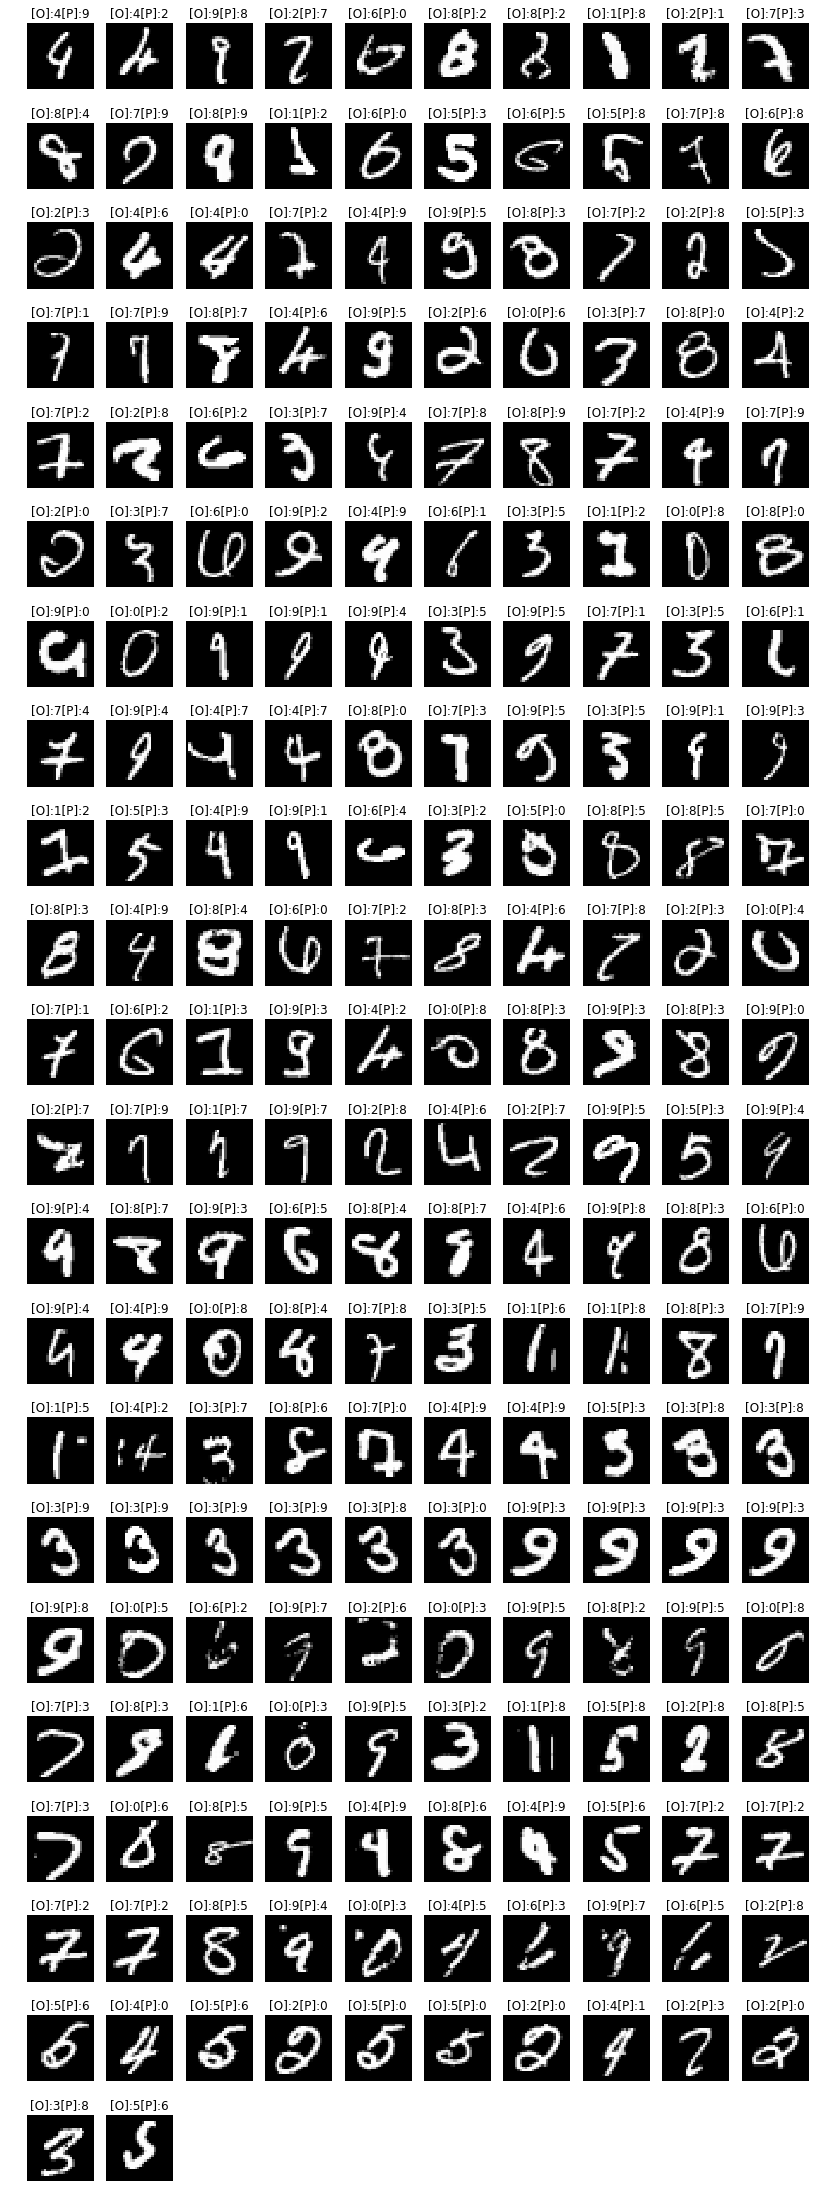

In [0]:
# 印出預測錯誤的資料
import numpy as np
false_index = np.nonzero(pre != y_test)[0]

false_img = x_test[false_index] # 測試圖片(預測錯誤)
ori_label = y_test[false_index] # 測試圖片答案(預測錯誤)
pre_label = pre[false_index] # 預測結果(預測錯誤)

# 用 sub plot 把多張圖合成一張
width = 10
height = int(len(false_index) / 10) + 1
plt.figure(figsize=(14,40)) # 設定顯示大小, 單位是英吋
for (index, img) in enumerate(false_img):
    plt.subplot(height, width, index+1) # index + 1 => 第 index+1 張
    msg = "[O]:" + str(ori_label[index]) + "[P]:" + str(pre_label[index])
    plt.title(msg)
    plt.axis("off")
    plt.imshow(img, cmap="gray")

In [0]:
# step 5 儲存模型
model.save("mlp_mnist.h5")

In [0]:
# 載入現有的模型
from keras.models import load_model
loaded = load_model("mlp_mnist.h5")
loaded.evaluate(x_test_shape, y_test_cat) # 使用載入的模型進行預測

10000/10000 [==============================] - 0s 38us/step


[0.07970833930954686, 0.9788]

重點筆記

**處理資料**

> 圖片: 標準化0~1之間

> 答案: 十個機率(One-Hot Encoding)

**建立模型**

> 中間層激活函數: relu
> 輸出層激活函數: softmax
> 激活偏移: bias

**訓練模型**

> epochs/batch

> validation loss/overfitting

**驗證模型**

> evaluate/predict_classes

> confusion_matrix

**儲存模型**

> save

> load_model